# NEW YORK AIRBNB

## Goals

- [ ] Visualize the position of the apartments in a map
  - [ ] find trend there
- [ ] Find cheap places to stay
- [ ] Find when reviews are written
- [ ] Check which factors affect the price the most
- [ ] Fit different models
- [ ] ...

But first of all. lets start with the basic stuff, imports and reading the data:

In [2]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.offline as pyo
import seaborn as sns
import matplotlib.pyplot as plt

pyo.init_notebook_mode()
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

Then lets read the data into a dataframe and take a look at it:

In [3]:
data = pd.read_csv("AB_NYC_2019.csv") 

data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## Column descriptions:

**id**: id of the record  
**name**: name of the listing  
**host_id**: id of the host  
**host_name**: name of the host  
**neighbourhood_group**: location  
**neighbourhood**: area  
**latitude**: latitude coordinates
**longitude**: longitude coordinates  
**room_type**: listing space type  
**price**: price in dollars  
**minimum_nights**: minimum nights to spend in the listing  
**number_of_reviews**: number of reviews  
**last_review**: latest review  
**reviews_per_month**: amount of reviews in a month  
**calculated_host_listings_count**: amount of listing per host  
**availability_365**: number of days when listing is available for booking

 ## EDA
 
 Mostl people start with the data cleaning, before the EDA, for me it makes more sense to first take a look at the "dirty" data and then check what needs to be cleaned, clean it and then go on with the EDA!
 
 First lets take a look at our columns:

In [4]:
print(list(data.columns))

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Then take a look at how many NaNs we have/ have not in our dataset, :

In [5]:
print(data.notna().sum(axis = 0))

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64


In [6]:
print(data.isna().sum(axis = 0))

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


And a general overview of the data:

In [7]:
data.info(null_counts = False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                int64
name                              object
host_id                           int64
host_name                         object
neighbourhood_group               object
neighbourhood                     object
latitude                          float64
longitude                         float64
room_type                         object
price                             int64
minimum_nights                    int64
number_of_reviews                 int64
last_review                       object
reviews_per_month                 float64
calculated_host_listings_count    int64
availability_365                  int64
dtypes: float64(3), int64(7), object(6)
memory usage: 6.0+ MB


In [8]:
print("id:")
print(data.id.unique())
print("---------------------------------------------")
print("name:")
print(data.name.unique())
print("---------------------------------------------")
print("host_id:")
print(data.host_id.unique())
print("---------------------------------------------")
print("host_name:")
print(data.host_name.unique())
print("---------------------------------------------")
print("neighbourhood_group:")
print(data.neighbourhood_group.unique())
print("---------------------------------------------")
print("neighbourhood:")
print(data.neighbourhood.unique())
print("---------------------------------------------")
print("latitude:")
print(data.latitude.unique())
print("---------------------------------------------")
print("longitude:")
print(data.longitude.unique())
print("---------------------------------------------")
print("room_type:")
print(data.room_type.unique())
print("---------------------------------------------")
print("price:")
print(data.price.unique())
print("---------------------------------------------")
print("minimum_nights:")
print(data.minimum_nights.unique())
print("---------------------------------------------")
print("number_of_reviews:")
print(data.number_of_reviews.unique())
print("---------------------------------------------")
print("last_review:")
print(data.last_review.unique())
print("---------------------------------------------")
print("reviews_per_month:")
print(data.reviews_per_month.unique())
print("---------------------------------------------")
print("calculated_host_listings_count:")
print(data.calculated_host_listings_count.unique())
print("---------------------------------------------")
print("availability_365:")
print(data.availability_365.unique())
print("---------------------------------------------")

id:
[    2539     2595     3647 ... 36485431 36485609 36487245]
---------------------------------------------
name:
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]
---------------------------------------------
host_id:
[     2787      2845      4632 ... 274321313  23492952  68119814]
---------------------------------------------
host_name:
['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']
---------------------------------------------
neighbourhood_group:
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
---------------------------------------------
neighbourhood:
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 '

### What tells us this

1. NaNs  
   *  We have 2 columns (last_review - 10052, reviews_per_month - 10052) which have quite some NaN values, this probably stems of the fact that they have no review, which is normal and we have to take into account if we work with such a dataset, so fine!  
  * The other 2 columns (name - 16, host_name - 21) are not impacting our data really, so I would suggest simply dropping them!
2. Datatypes:
  * A fear of mine is that we have a lot of wrong datatypes in the set, e.g. numerical columns which have strings in them or stuff like that, but this looks fine, so lets continue!
3. Columns names:
  * They look fine as well, you know what they are directly and are not too long as well!
4. Categorical Values:
  * Todo

## Data cleaning

1. Remove id column
2. Drop records where host_name or name is NaN
3. Bring Categorical Values into numerical ones

No big deal the rest of the data seems pretty good, no \n inbetween strings or null between NaNs or something similar, looks good!

In [9]:
data = data.drop('id', axis=1)
data = data[pd.notnull(data['host_name'])]
data = data[pd.notnull(data['name'])]

print(data.isna().sum(axis = 0))

name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Now re removed the id column and dropped all records where name or hostname is NaN, lets get to number 3, first lets check which columns we can make numerical, we now that from the check of the datatyped of the df (data.dtypes):

* name                                  **object**
* host_name                         **object**
* neighbourhood_group     **object**
* neighbourhood                 **object**
* room_type                          **object**
* last_review                          **object**


We can use the column:
* neighbourhood_group
* neighbourhood
* room_type

The others are simply names that would make no sense!

In [10]:
print("---------------------------------------------")
print("neighbourhood_group:")
print(data.neighbourhood_group.unique())
print("---------------------------------------------")
print("---------------------------------------------")
print("neighbourhood:")
print(data.neighbourhood.unique())
print("---------------------------------------------")
print("---------------------------------------------")
print("room_type:")
print(data.room_type.unique())
print("---------------------------------------------")


---------------------------------------------
neighbourhood_group:
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
---------------------------------------------
---------------------------------------------
neighbourhood:
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Isla

There are too many **neighbourhood**'s, and the **neighbourhood_group** also does contain no data which can be ranked in a logical way, so lets leave them away and focus on the **room type**:

In [58]:
data['room_type'] = data['room_type'].replace('Shared room', 0)
data['room_type'] = data['room_type'].replace('Private room', 1)
data['room_type'] = data['room_type'].replace('Entire home/apt', 2)

Why changing to categorical values:
* Easier visualisation, can be shown with colors or forms
* Can be used in heatmaps to see correlatiions

## Visualising

### Heatmap

TODO: describe

In [12]:
pyo.init_notebook_mode()
data.drop('host_id', axis=1).corr().iplot(kind='heatmap',colorscale="blues", title="Feature Correlation Matrix")

### Map of Airbnbs

#### Folium ####

In [13]:
# !pip install folium

import folium
from IPython.display import HTML, display

# Create a map object of the city of Barcelona
new_york_map= folium.Map(location=[40.64749,-73.97237], zoom_start=10)

for index, row in data.iterrows():
    if index < 3000:
        folium.CircleMarker(
            [row['latitude'],row['longitude']],
            radius=3,
            color='red',
            fill=True,
            #popup=row['neighbourhood_group'],
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(new_york_map)
   
display(new_york_map)

In [44]:
data.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  4.885800e+04  48858.000000  48858.000000  48858.000000    48858.000000   
mean   6.763169e+07     40.728941    -73.952170    152.740309        7.012444   
std    7.862389e+07      0.054528      0.046159    240.232386       20.019757   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.818669e+06     40.690090    -73.983070     69.000000        1.000000   
50%    3.079133e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763107    -73.936280    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48858.000000       38821.000000                    48858.000000   
mean           23.273098           1.373229                        7.148369   
std            44.549898           1.680328                       32.964600   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48858.000000  
mean         112.801425  
std          131.610962  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

Very interesting to see, now we have a general idea of NEW York, lets check this in more detail in a scatter plot:

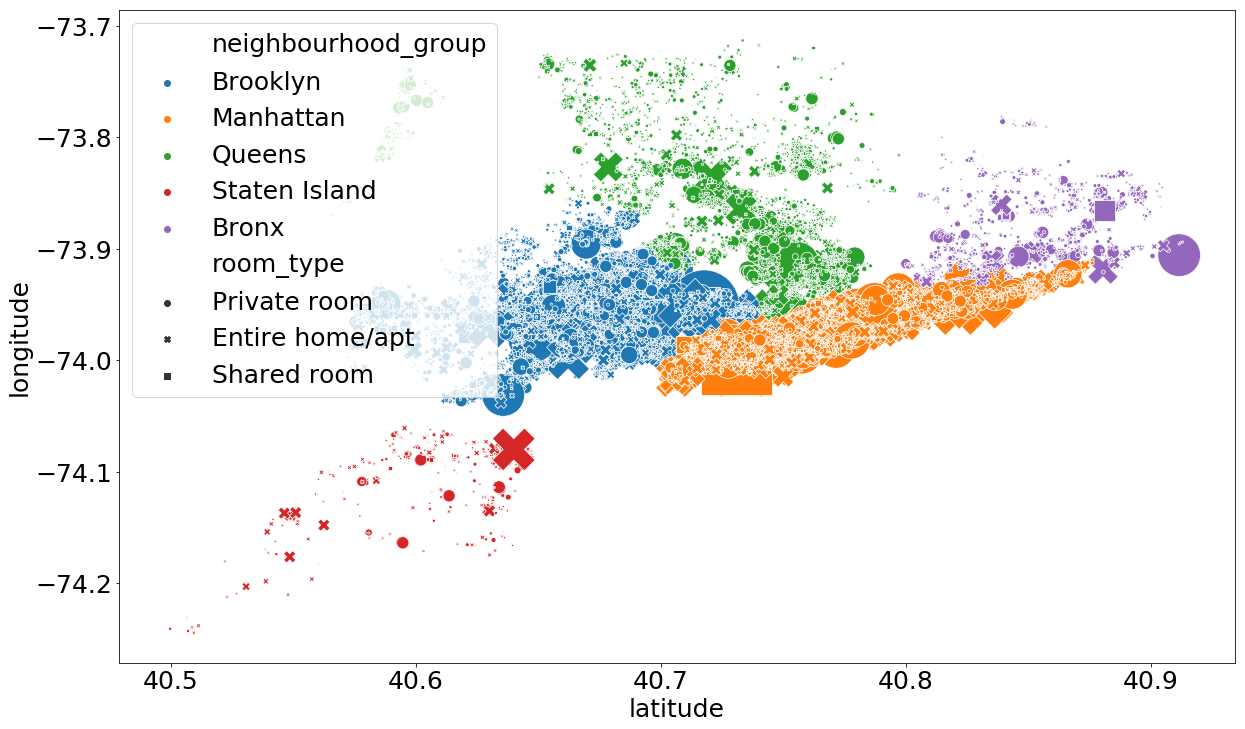

In [51]:
fig = plt.figure(1, figsize=(20,12))

data_scatter = data

data_scatter['room_type'] = data_scatter['room_type'].replace(0, 'Shared room')
data_scatter['room_type'] = data_scatter['room_type'].replace(1, 'Private room')
data_scatter['room_type'] = data_scatter['room_type'].replace(2, 'Entire home/apt')

ax = sns.scatterplot(x="latitude"
                                 , y="longitude"
                                 , data=data
                                 , hue='neighbourhood_group'
                                 , style='room_type'
                                 , s= data['minimum_nights'].values * 5
)

### Pairplot

A pairplot is a very good tool to show correlations as well as the distribution of the data:

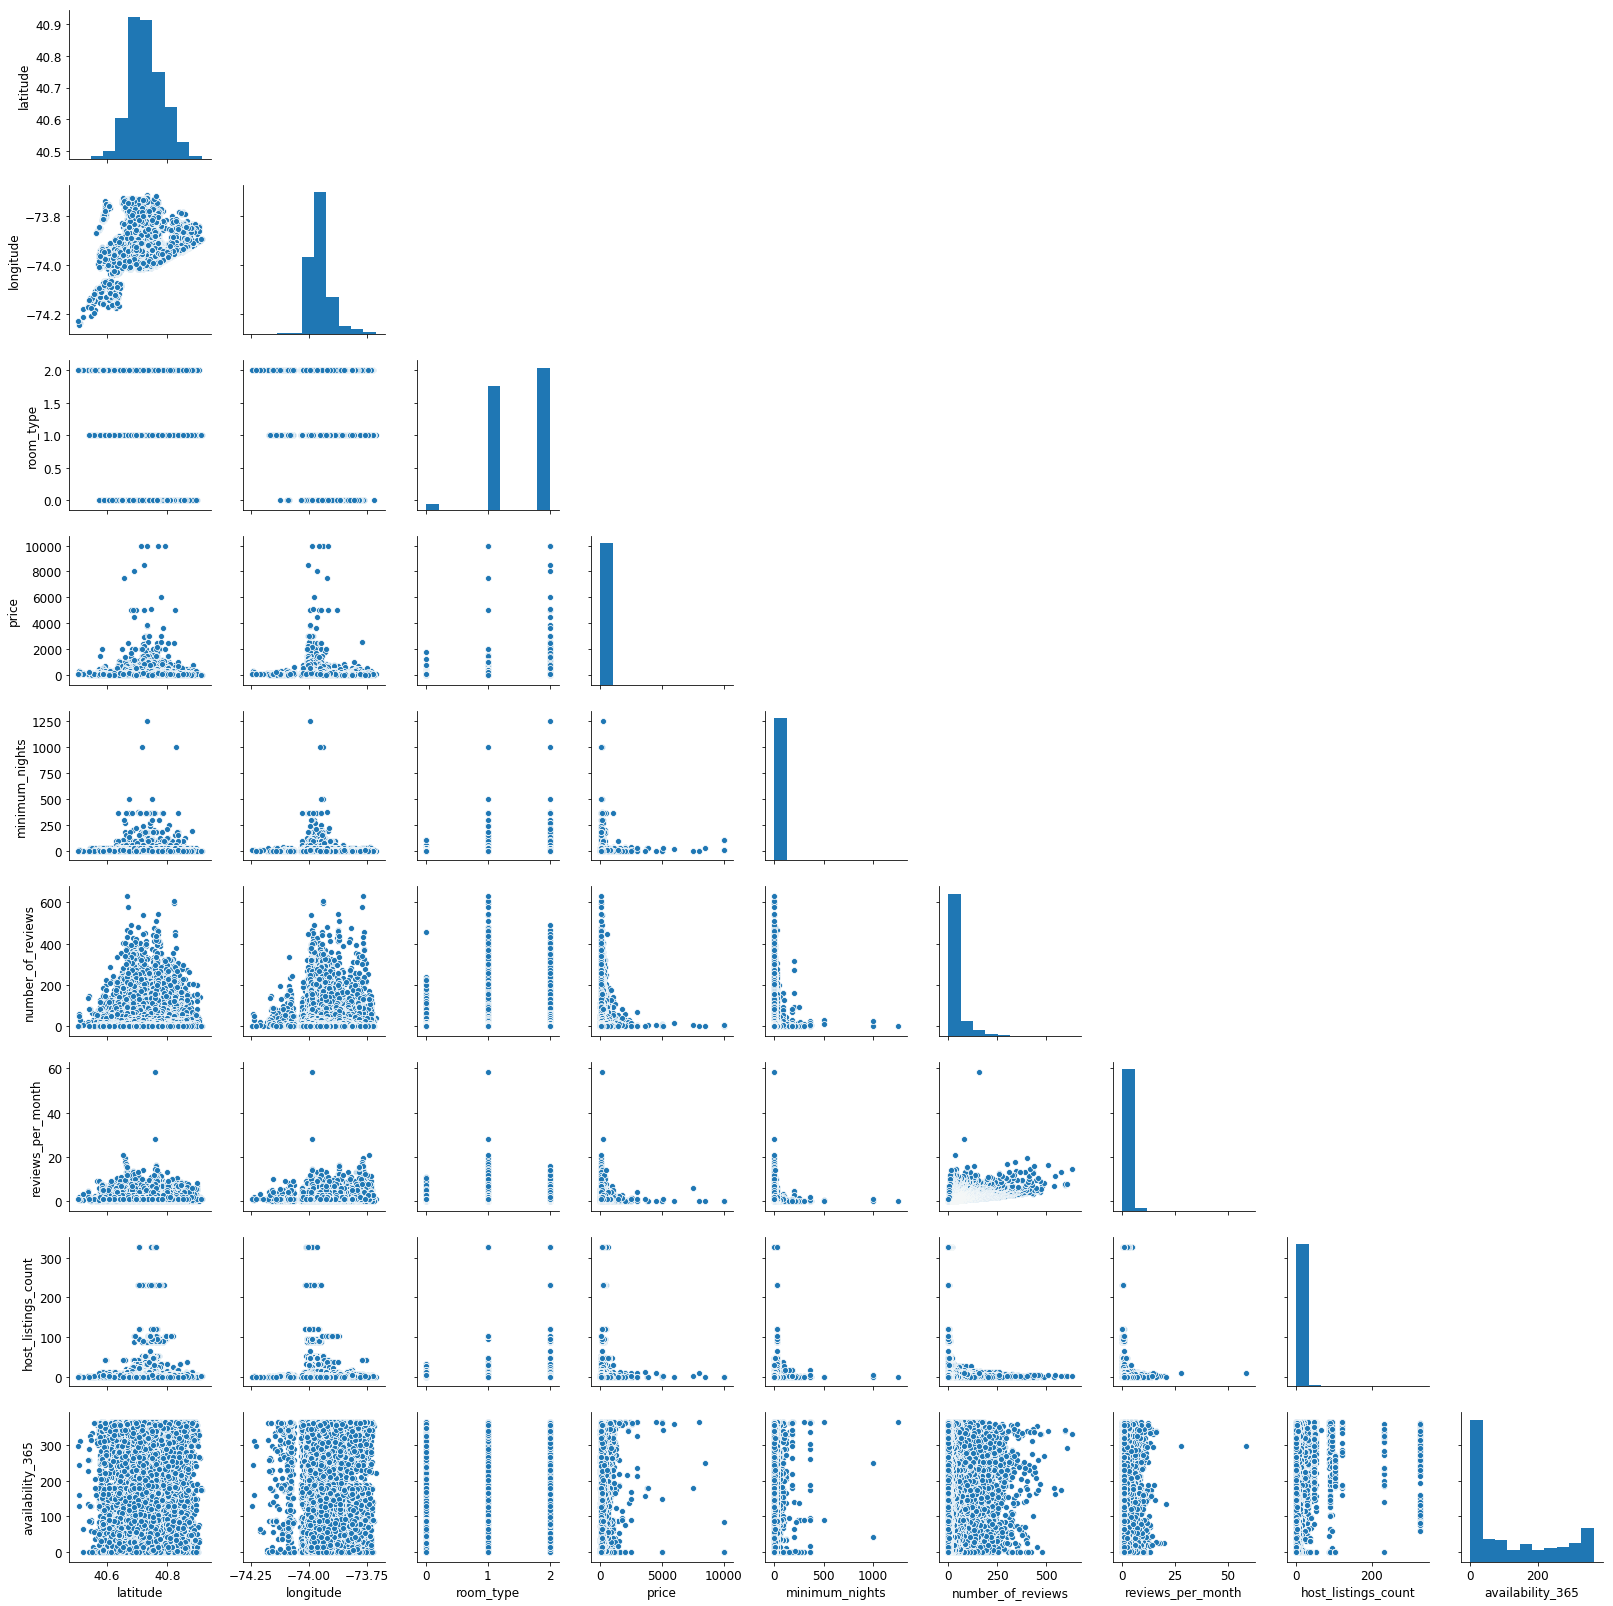

In [93]:
data_pairplot = data[[   'neighbourhood_group'
                                                       , 'latitude'
                                                       , 'longitude'
                                                       , 'room_type'
                                                       , 'price'
                                                       , 'minimum_nights'
                                                       , 'number_of_reviews'
                                                       , 'reviews_per_month'
                                                       , 'calculated_host_listings_count'
                                                       , 'availability_365']].dropna()

data_pairplot = data_pairplot.rename(columns={"calculated_host_listings_count": "host_listings_count"}, errors="raise")

plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize']=(100,100)
g.fig.set_size_inches(15,15)

g = sns.pairplot(data_pairplot, size=2.5)

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

### Scatterplot of the reviews

## Model

For this test we are gonna use, three methods of ML:
* Light Gradient-Boosting classifier (LGBM)
* XGBoost classifier
* simple neural network with keras

### Prerequsities 

Split data into training and testing data:

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(   data[['latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']]
                                                                                , data['price']
                                                                                , test_size = .2
                                                                                , random_state = 1
                                                                                , shuffle = True)

#### LGBM ####

Simple but can be effective, lets try it out:

In [15]:
'''
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, max_depth=6, random_state=1)
gbm.fit(X_train, y_train)

# Check results
train_pred = gbm.predict(X_train)
val_pred = gbm.predict(X_val)
val_accuracy = round(accuracy_score(y_val,val_pred), 4)
train_accuracy = round(accuracy_score(y_train, train_pred), 4)

print(train_pred)
print(val_pred)
print(val_accuracy)
print(train_accuracy)
'''

'\nfrom sklearn.ensemble import GradientBoostingClassifier\n\ngbm = GradientBoostingClassifier(n_estimators=200, max_depth=6, random_state=1)\ngbm.fit(X_train, y_train)\n\n# Check results\ntrain_pred = gbm.predict(X_train)\nval_pred = gbm.predict(X_val)\nval_accuracy = round(accuracy_score(y_val,val_pred), 4)\ntrain_accuracy = round(accuracy_score(y_train, train_pred), 4)\n\nprint(train_pred)\nprint(val_pred)\nprint(val_accuracy)\nprint(train_accuracy)\n'

#### XG-Booost ####

Won a lot of kaggle challanged, so definitely worth to give it a try:

In [16]:
'''
xgb_params = {'objective' : 'multi:softmax',
    'eval_metric' : 'mlogloss',
    'eta' : 0.1,
    'max_depth' : 6,
    'num_class' : 3,
    'lambda' : 0.8,
    'estimators' : 200,
    'seed' : seed
}

target_train = y_train.astype('category').cat.codes
target_val = y_val.astype('category').cat.codes

# Transform data into a matrix so that we can use XGBoost
d_train = xgb.DMatrix(X_train, label = target_train)
d_val = xgb.DMatrix(X_val, label = target_val)

# Fit XGBoost
watchlist = [(d_train, 'train'), (d_val, 'validation')]
bst = xgb.train(xgb_params, d_train, 400, watchlist, 
early_stopping_rounds = 50, verbose_eval = 0)

# Check results for XGBoost
train_pred = bst.predict(d_train)
val_pred = bst.predict(d_val)
'''

"\nxgb_params = {'objective' : 'multi:softmax',\n    'eval_metric' : 'mlogloss',\n    'eta' : 0.1,\n    'max_depth' : 6,\n    'num_class' : 3,\n    'lambda' : 0.8,\n    'estimators' : 200,\n    'seed' : seed\n}\n\ntarget_train = y_train.astype('category').cat.codes\ntarget_val = y_val.astype('category').cat.codes\n\n# Transform data into a matrix so that we can use XGBoost\nd_train = xgb.DMatrix(X_train, label = target_train)\nd_val = xgb.DMatrix(X_val, label = target_val)\n\n# Fit XGBoost\nwatchlist = [(d_train, 'train'), (d_val, 'validation')]\nbst = xgb.train(xgb_params, d_train, 400, watchlist, \nearly_stopping_rounds = 50, verbose_eval = 0)\n\n# Check results for XGBoost\ntrain_pred = bst.predict(d_train)\nval_pred = bst.predict(d_val)\n"

#### Neural Network ####

Most advanced but also intensive technology, lets try it out:

In [17]:
'''
# Generator so we can easily feed batches of data to the neural network
def batch_generator(X, y, batch_size, shuffle):
    number_of_batches = X.shape[0]/batch_size
    counter = 0
    sample_index = np.arange(X.shape[0])
    
    if shuffle:
        np.random.shuffle(sample_index)
    while True:
        batch_index = sample_index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X[batch_index,:].toarray()
        y_batch = y[batch_index]
        counter += 1        yield X_batch, y_batch
        if (counter == number_of_batches):
            if shuffle:
                np.random.shuffle(sample_index)
            counter = 0
            
# Initialize sklearn's one-hot encoder class
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_train = np.array(y_train).reshape(len(y_train), 1)
onehot_encoded_train = onehot_encoder.fit_transform(integer_encoded_train)
integer_encoded_val = np.array(y_val).reshape(len(y_val), 1)
onehot_encoded_val = onehot_encoder.fit_transform(integer_encoded_val)

# Neural network architecture
initializer = keras.initializers.he_normal(seed=seed)
activation = keras.activations.elu
optimizer = keras.optimizers.Adam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=4)
# Build model architecture
model = Sequential()
model.add(Dense(20, activation=activation, kernel_initializer=initializer, input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax', kernel_initializer=initializer))
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Hyperparameters
epochs = 15
batch_size = 32
# Fit the model using the batch_generator
hist = model.fit_generator(generator=batch_generator(X_train, onehot_encoded_train, batch_size=batch_size, shuffle=True), epochs=epochs, validation_data=(X_val, onehot_encoded_val), steps_per_epoch=X_train.shape[0]/batch_size, callbacks=[es])
'''

"\n# Generator so we can easily feed batches of data to the neural network\ndef batch_generator(X, y, batch_size, shuffle):\n    number_of_batches = X.shape[0]/batch_size\n    counter = 0\n    sample_index = np.arange(X.shape[0])\n    \n    if shuffle:\n        np.random.shuffle(sample_index)\n    while True:\n        batch_index = sample_index[batch_size*counter:batch_size*(counter+1)]\n        X_batch = X[batch_index,:].toarray()\n        y_batch = y[batch_index]\n        counter += 1        yield X_batch, y_batch\n        if (counter == number_of_batches):\n            if shuffle:\n                np.random.shuffle(sample_index)\n            counter = 0\n            \n# Initialize sklearn's one-hot encoder class\nonehot_encoder = OneHotEncoder(sparse=False)\ninteger_encoded_train = np.array(y_train).reshape(len(y_train), 1)\nonehot_encoded_train = onehot_encoder.fit_transform(integer_encoded_train)\ninteger_encoded_val = np.array(y_val).reshape(len(y_val), 1)\nonehot_encoded_val = o